![Algol](EulerAlgol.jpg)


In [37]:
import pandas as pd
import matplotlib.pyplot as plt


In [42]:
def f_expr(expression):
    #Função para criar uma função a partir de uma expressão
    ## Entrada: expressão em formato de string
    ## Saída: função em formato de lambda
    
    return eval(f'lambda x, y: {expression}')

def InterpretacaoGrafica(x,y):
    
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpretação Gráfica - Método de Euler')
    plt.plot(x,y)
    
def InterpretacaoGraficaMultiplasCurvas(x,y):
    
    #Função para plotar múltiplas curvas em um mesmo gráfico
    # y é uma lista de listas, onde cada lista é um conjunto de pontos y para uma curva
    
    plt.figure(figsize=(10,10))
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpretação Gráfica - Método de Euler')
    for i in range(len(y)):
        plt.plot(x,y[i])
    
    

In [22]:
def MetodoEulerEquacaoDiferencial(a, b, m, y0, f):
    # Recebe os valores dos intervalos a e b, o número de subintervalos m, o valor inicial y0 e a função f(x, y)
    # Realiza o método de Euler para a resolução de EDOs
    # Retorna um DataFrame com os valores de x, y e f(x,y)

    # Vetores de tamanho m para guardar os valores de x, y e f(x,y)
    Vetx = []
    Vety = []
    Fxy = []

    x = a
    y = y0

    h = (b - a) / m  # Tamanho do passo

    Fxy.append(f(x, y))
    Vetx.append(x)
    Vety.append(y)

    for i in range(1, m + 1):
        x = a + i * h
        y = y + h * Fxy[i - 1]
        Fxy.append(f(x, y))
        Vetx.append(x)
        Vety.append(y)

    # Retorna um DataFrame com os valores de x, y e f(x,y)
    return pd.DataFrame({'x': Vetx, 'y': Vety, 'f(x,y)': Fxy})



In [43]:
def MetodoEulerSistemaEquacoes(a,b,m,y01,y02,f1,f2):
    # Recebe os valores dos intervalos a e b, o número de subintervalos m, os valores iniciais y01 e y02 e as funções f1(x, y) e f2(x, y)
    # Realiza o método de Euler para a resolução de sistemas de EDOs
    # Retorna um DataFrame com os valores de x, y1, y2, f1(x,y) e f2(x,y)

    # Vetores de tamanho m para guardar os valores de x, y1, y2, f1(x,y) e f2(x,y)
    Vetx = []
    Vety1 = []
    Vety2 = []
    Fxy1 = []
    Fxy2 = []

    x = a
    y1 = y01
    y2 = y02

    h = (b - a) / m  # Tamanho do passo

    Fxy1.append(f1( y1, y2))
    Fxy2.append(f2( y1, y2))
    Vetx.append(x)
    Vety1.append(y1)
    Vety2.append(y2)

    for i in range(1, m + 1):
        x = a + i * h
        y1 = Vety1[i-1] + h * Fxy1[i - 1]
        y2 = Vety2[i-1] + h * Fxy2[i - 1]
        Fxy1.append(f1( y1, y2))
        Fxy2.append(f2( y1, y2))
        Vetx.append(x)
        Vety1.append(y1)
        Vety2.append(y2)

    # Retorna um DataFrame com os valores de x, y1, y2, f1(x,y) e f2(x,y)
    return pd.DataFrame({'x': Vetx, 'y1': Vety1, 'y2': Vety2, 'f1(x,y)': Fxy1, 'f2(x,y)': Fxy2})

![ExpectedReturn](ExpectedReturn.jpg)


In [44]:
# Exemplo de uso com a função definida como uma string

F = "x - 2*y + 1" 
saida  = MetodoEulerEquacaoDiferencial(0, 1, 10, 1, f_expr(F))
saida



,x,y,"f(x,y)"
0,0.0,1.000000,-1.000000
1,0.1,0.900000,-0.700000
2,0.2,0.830000,-0.460000
3,0.3,0.784000,-0.268000
4,0.4,0.757200,-0.114400
5,0.5,0.745760,0.008480
6,0.6,0.746608,0.106784
7,0.7,0.757286,0.185427
8,0.8,0.775829,0.248342
9,0.9,0.800663,0.298673


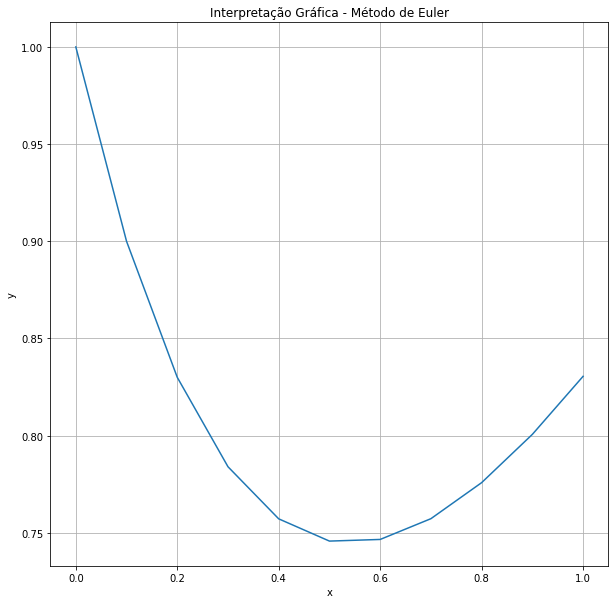

In [45]:
InterpretacaoGrafica(saida['x'],saida['y'])

In [46]:
FX1 = "-x*y"
FX2 = "2*x"

saida = MetodoEulerSistemaEquacoes(0, 1, 2, 1, -1, f_expr(FX1), f_expr(FX2))
saida

,x,y1,y2,"f1(x,y)","f2(x,y)"
0,0.0,1.0,-1.0,1.00,2.0
1,0.5,1.5,0.0,-0.00,3.0
2,1.0,1.5,1.5,-2.25,3.0


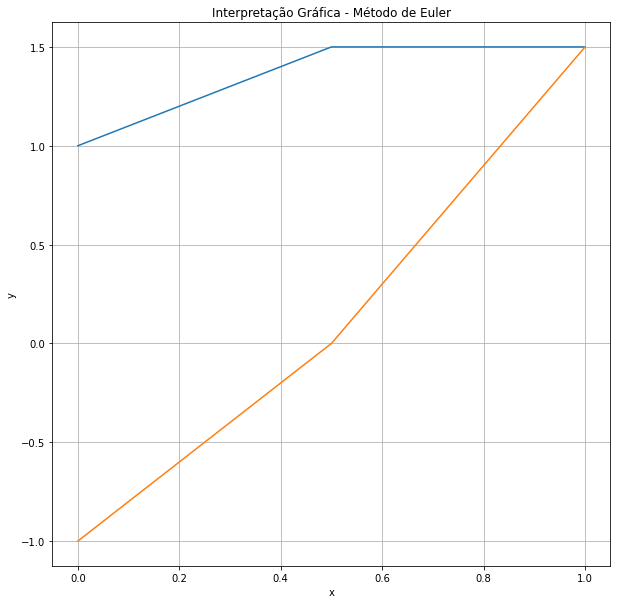

In [47]:
InterpretacaoGraficaMultiplasCurvas(saida['x'],[saida['y1'],saida['y2']])